In [3]:
import numpy as np
import uproot
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [48]:
# file = uproot.open("/srv01/agrp/annai/annai/QURK-GLUON/PartNet_Local/training/PartickleNet_newgpus/kinpid/predict_output/prediction_kinpid_ep21.root")
# file3 = uproot.open("/srv01/agrp/annai/annai/QURK-GLUON/PartNet_Local/training/PartickleNet_Herwig/kinpid/predict_output/prediction_kinpid_ep19.root")

file = uproot.open("/srv01/agrp/annai/annai/QURK-GLUON/PartNet_Local/training/PartNet_hgpflow_pythia/kin/predict_output/prediction_py_kin.root")
file3 = uproot.open("/srv01/agrp/annai/annai/QURK-GLUON/PartNet_Local/training/PartNet_hgpflow_herwig/kin/predict_output/prediction_hw_kin.root")


tree = file["Events"]
df = tree.arrays(library='pd')

tree3 = file3["Events"]
df3 = tree3.arrays(library='pd')


file2 = uproot.open("/srv01/agrp/annai/annai/QURK-GLUON/PartNet_Local/training/QuarkGluon_OldData/kinpid/predict_output/prediction_kinpid_old_ep17.root")
file4 = uproot.open("/srv01/agrp/annai/annai/QURK-GLUON/PartNet_Local/training/QuarkGluon_OldData_Herwig/kinpid/predict_output/prediction_kinpid_old_ep27.root")

# file2 = uproot.open("/srv01/agrp/annai/annai/QURK-GLUON/PartNet_Local/training/QuarkGluon_OldData/kin/predict_output/prediction_kin_old_ep17.root")
# file4 = uproot.open("/srv01/agrp/annai/annai/QURK-GLUON/PartNet_Local/training/QuarkGluon_OldData_Herwig/kin/predict_output/prediction_kin_old_ep27.root")

tree2 = file2["Events"]
df2 = tree2.arrays(library='pd')

tree4 = file4["Events"]
df4 = tree4.arrays(library='pd')



In [49]:
auc = roc_auc_score(df['jet_isQ'],df['score_jet_isQ'], average='macro', multi_class='ovo')
print("AUC:", auc)

auc2 = roc_auc_score(df2['jet_isQ'],df2['score_jet_isQ'], average='macro', multi_class='ovo')
print("AUC:", auc2)

auc3 = roc_auc_score(df3['jet_isQ'],df3['score_jet_isQ'], average='macro', multi_class='ovo')
print("AUC:", auc3)

auc4 = roc_auc_score(df4['jet_isQ'],df4['score_jet_isQ'], average='macro', multi_class='ovo')
print("AUC:", auc4)


AUC: 0.8731891327312482
AUC: 0.9077504231584632
AUC: 0.8365309500032524
AUC: 0.8397642599851998


In [50]:
fpr, tpr, thresholds = roc_curve(df['jet_isQ'], df['score_jet_isQ'])
fpr2, tpr2, thresholds2 = roc_curve(df2['jet_isQ'], df2['score_jet_isQ'])

fpr3, tpr3, thresholds3 = roc_curve(df3['jet_isQ'], df3['score_jet_isQ'])
fpr4, tpr4, thresholds4 = roc_curve(df4['jet_isQ'], df4['score_jet_isQ'])


epsilon = 1e-10
fpr_safe = np.where(fpr == 0, epsilon, fpr)
fpr2_safe = np.where(fpr2 == 0, epsilon, fpr2)


In [51]:
# Find the threshold closest to TPR = 50%
target_tpr = 0.5
closest_tpr_idx = np.argmin(np.abs(tpr - target_tpr))
closest_tpr = tpr[closest_tpr_idx]
closest_fpr = fpr[closest_tpr_idx]

closest_tpr_idx2 = np.argmin(np.abs(tpr2 - target_tpr))
closest_tpr2 = tpr2[closest_tpr_idx2]
closest_fpr2 = fpr2[closest_tpr_idx2]

closest_tpr_idx3 = np.argmin(np.abs(tpr3 - target_tpr))
closest_tpr3 = tpr3[closest_tpr_idx3]
closest_fpr3 = fpr3[closest_tpr_idx3]

closest_tpr_idx4 = np.argmin(np.abs(tpr4 - target_tpr))
closest_tpr4 = tpr2[closest_tpr_idx4]
closest_fpr4 = fpr2[closest_tpr_idx4]

print(closest_fpr)
# Calculate the rejection at TPR = 50%
rejection_at_50_tpr = 1 / closest_fpr if closest_fpr != 0 else np.inf

rejection_at_50_tpr2 = 1 / closest_fpr2 if closest_fpr2 != 0 else np.inf

rejection_at_50_tpr3 = 1 / closest_fpr3 if closest_fpr3 != 0 else np.inf

rejection_at_50_tpr4 = 1 / closest_fpr4 if closest_fpr4 != 0 else np.inf


0.04132398203743882


In [53]:
print(f"Rejection at TPR = 50%: {rejection_at_50_tpr}")
# print(f"Corresponding FPR: {closest_fpr}")
# print(f"Corresponding TPR: {closest_tpr}")
print(f"Rejection at TPR = 50%: {rejection_at_50_tpr2}")
print(f"Rejection at TPR = 50%: {rejection_at_50_tpr3}")
print(f"Rejection at TPR = 50%: {rejection_at_50_tpr4}")


Rejection at TPR = 50%: 24.199023199023202
Rejection at TPR = 50%: 38.12428516965307
Rejection at TPR = 50%: 15.675613496932517
Rejection at TPR = 50%: 20.964360587002098


/tmp/ipykernel_3103267/2875569561.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr,1/fpr,linestyle='-',color='b', lw=2, label="Pythia8 - kin")
/tmp/ipykernel_3103267/2875569561.py:5: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr3,1/fpr3,linestyle='-',color='g', lw=2, label="Herwig - kin")


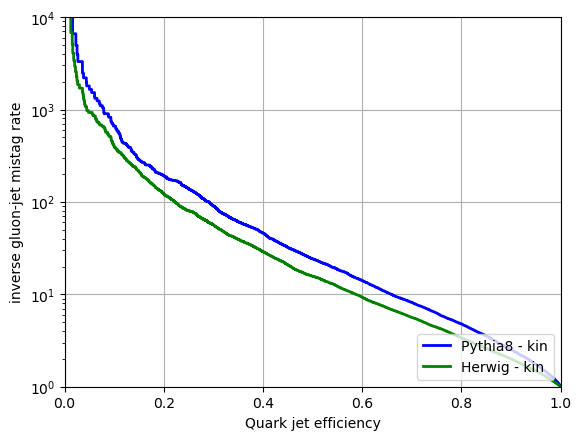

In [54]:
plt.figure()
plt.plot(tpr,1/fpr,linestyle='-',color='b', lw=2, label="Pythia8 - kin")
#plt.plot(tpr2,1/fpr2,linestyle='--',color='b', lw=2, label="Pythia8 old - kin")
#plt.plot(tpr2,1/fpr2,linestyle='--',color='b', lw=2, label="Pythia8 - kinpid")
plt.plot(tpr3,1/fpr3,linestyle='-',color='g', lw=2, label="Herwig - kin")
#plt.plot(tpr6,1/fpr6,color='r', lw=2, label="Pythia8 old - kinpid")
#plt.plot(tpr4,1/fpr4,linestyle='--',color='g', lw=2, label="Herwig old - kin")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xscale('linear')
plt.yscale('log')
plt.xlim([0.0, 1.0])
plt.ylim([1, 1e4])  # Adjust this based on your data
plt.xlabel('Quark jet efficiency')
plt.ylabel('inverse gluon-jet mistag rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()